In [6]:
import numpy as np
import networkx as nx
import random
import pandas as pd
import matplotlib.pyplot as plt

# q-voter model

Each Monte Carlo step consists of $N$ elementary events, each of which may be divided into the following steps: 
1. pick a spinson at random, 
2. decide with probability p, if the spinson will act as independent, 
3. if independent, change its opinion with probability 1/2, 
4. if not independent, let the spinson take the opinion of its randomly chosen group of influence, provided the group is unanimous

In [86]:
def q_voter_model(G, q, p, MC):
    """
    Implementaion of the q-voter model with independence with NN influence group. Return array with opinios.
    
    q_voter_model(G: nx.Graph, q: int, p: float, MC: int) -> np.array
    
    Parameters
    ----------
    G: nx.Graph
        Network on which method simulates the q-voter model
    q: int
        Number of randomly picked neighbors influence a voter to change its opinion
    p: float
        Probability, if the spinson will act as independent
    MC: int
        Number of Monte Carlo simultaions
        
    Return
    ----------
    np.array with opinions for each Monte Carlo step
    """
    # At the beggining all people have the same opinions
    opinions = np.ones(len(G))
    
    results = [np.copy(opinions)]
    
    # Monte Carlo steps
    for i in range(MC):
        # N events for each Monte Carlo step
        for j in range(len(G)):
            # Pick a spinson at random
            spinson = random.choice(list(G.nodes))

            # Decide with probability p, if the spinson will act as independent,
            if random.random() < p:   # Independence
                # Change its opinion with probability 1/2
                if random.random() < 0.5:
                    opinions[spinson] *= -1 
            else:   # Conformity
                # Choose q neighbors of site i (a so called q-panel):
                neigh = list(G.neighbors(spinson)) 
                if len(neigh) >= q:
                    q_panel = random.sample(neigh, q)
                    # If all the q neighbors are in the same state, i.e. q-panel is unanimous, 
                    # the spinson takes the state of the q neighbors.
                    op_q = [opinions[person] for person in q_panel]
                    q_sum = np.sum(op_q)
                    if np.abs(q_sum) == q:
                        opinions[spinson] = op_q[0]
        results.append(np.copy(opinions))
    return np.array(results)

For the models of opinion dynamics, the most natural order parameter is an average opinion $m$, defined as magnetization i.e. $m = \frac{1}{N} \sum S_i$

In [92]:
def magnetization(G, q, pp, MC, N, single = False):
    """
    Calculate average magnetization for network with different probabilities for independence. 
    If it is needed, calculate magnetization from single run.
    
    magnetization(G: nx.Graph, q: int, pp: np.array, MC: int, N: int, single: bool) -> np.array or (np.array, np.array)
    
    Parameters
    ----------
    G: nx.Graph
        Network on which method simulates the q-voter model
    q: int
        Number of randomly picked neighbors influence a voter to change its opinion
    pp: float
        Array with probabilities, if the spinson will act as independent
    MC: int
        Number of Monte Carlo simultaions
    N: int
        Number of simulations of q-voter
    single: bool
        Flag if we need magnetization from single run
        
    Return
    ----------
    np.array with average magnetization for different p or 
    (np.array, np.array) with average magnetization and magnetization from single run for different p
    """
    magn = []
    if single:
        magn_single = []
    for p in pp:
        opinions = []
        for j in range(N):
            opinions.append(q_voter_model(G, q, p, MC))
        m = np.mean(opinions, axis = 2)
        if single:
            magn_single.append(m[0])
        magn.append(np.mean(m, axis = 0))
    if single:
        return np.array(magn), np.array(magn_single)
    else:
        return np.array(magn)

In [46]:
def save_data(data, file_name):
    """ 
    Save the results to the csv file.
    
    save_data(data: np.array, file_name: str) ->

    Parameters
    ------
    data: np.array
        The array with simulations
    file_name: str
        The name of csv file
    """
    df = pd.DataFrame(data)    
    df.to_csv(file_name) 

In [47]:
def download_data(file_name):
    """
    Dowload saved data.
    
    download_data(file_name: str) -> np.array

    Parameters
    ------
    file_name: str
        The name of csv file

    Return
    -------
    np.array with data
    """
    df = pd.read_csv(file_name, index_col = 0)
    return df.to_numpy()

In [25]:
numb_nodes = 100
q1 = 3
q2 = 4
p = np.arange(0, 0.51, 0.02)
MC = 1000
N = 100

In [26]:
G_cg = nx.complete_graph(numb_nodes)
G_ba = nx.barabasi_albert_graph(numb_nodes, 4)
G_ws1 = nx.watts_strogatz_graph(numb_nodes, 4, 0.01)
G_ws2 = nx.watts_strogatz_graph(numb_nodes, 4, 0.2)

# Calculation

For each parameter set calculate the magnetization in the system as a function of time, averaged over 100 independent runs.

Also save results for csv files.

## For $q = 3$

In [84]:
cg_q1 = magnetization(G_cg, q1, p, MC, N)
save_data(cg_q1, "cg_q1.csv")

In [85]:
ba_q1 = magnetization(G_ba, q1, p, MC, N)
save_data(ba_q1, "ba_q1.csv")

In [ ]:
ws1_q1, ws1_q1_single = magnetization(G_ws1, q1, p, MC, N, single = True)
save_data(ws1_q1, "ws1_q1.csv")
save_data(ws1_q1_single, "ws1_q1_single.csv")

In [ ]:
ws2_q1 = magnetization(G_ws2, q1, p, MC, N)
save_data(ws2_q1, "ws2_q1.csv")

## For $q = 4$

In [ ]:
cg_q2 = magnetization(G_cg, q2, p, MC, N)
save_data(cg_q2, "cg_q2.csv")

In [ ]:
ba_q2 = magnetization(G_ba, q2, p, MC, N)
save_data(ba_q2, "ba_q2.csv")

In [ ]:
ws1_q2, ws1_q2_single = magnetization(G_ws1, q2, p, MC, N, single = True)
save_data(ws1_q2, "ws1_q2.csv")
save_data(ws1_q2_single, "ws1_q2_single.csv")

In [ ]:
ws2_q2 = magnetization(G_ws2, q2, p, MC, N)
save_data(ws2_q2, "ws2_q2.csv")

## Upload data

In [125]:
d_cg_q1 = download_data("cg_q1.csv")
d_ba_q1 = download_data("ba_q1.csv")
d_ws1_q1 = download_data("ws1_q1.csv")
d_ws1_q1_single = download_data("ws1_q1_single.csv")
d_ws2_q1 = download_data("ws2_q1.csv")

d_cg_q2 = download_data("cg_q2.csv")
d_ba_q2 = download_data("ba_q2.csv")
d_ws1_q2 = download_data("ws1_q2.csv")
d_ws1_q2_single = download_data("ws1_q2_single.csv")
d_ws2_q2 = download_data("ws2_q2.csv")

# The time evolution of the magnetization

Plot the time evolution of the magnetization for the $WS(100,4,0.01)$ network (both averaged and from single run).

In [122]:
def draw_time_magn(average, single, MC, q, p):
    """
    Plot the time evolution of the magnetization for the network (both averaged and from single run) for different p.
    
    draw_time_magn(average: np.array, single: np.array, MC: int, q: int, p: np.array) -> np.array

    Parameters
    ------
    average: np.array
        Array with average magnetization for diiferent p    
    single: np.array
        Array with magnetization from single run for diiferent p 
    MC: int
        Number of Monte Carlo simultaions
    q: int
        Number of randomly picked neighbors influence a voter to change its opinion
    p: float
        Array with probabilities, if the spinson will act as independent
    """
    fig, axes = plt.subplots(7, 4, figsize = (27, 40))
    
    for i in range(len(p)):
        axes[i//4][i%4].scatter(range(MC + 1), average[i], label = 'Average', marker = 'o')
        axes[i//4][i%4].scatter(range(MC + 1), single[i], label = 'Single', marker = 's')
        axes[i//4][i%4].legend()
        axes[i//4][i%4].set(xlabel = 'time', ylabel = 'magnetization')
        axes[i//4][i%4].set_title(rf"Magnetization for $p = {p[i]}$")
        axes[i//4][i%4].tick_params(axis = 'y', labelrotation = 45)
    plt.show()

## For $q = 3$.

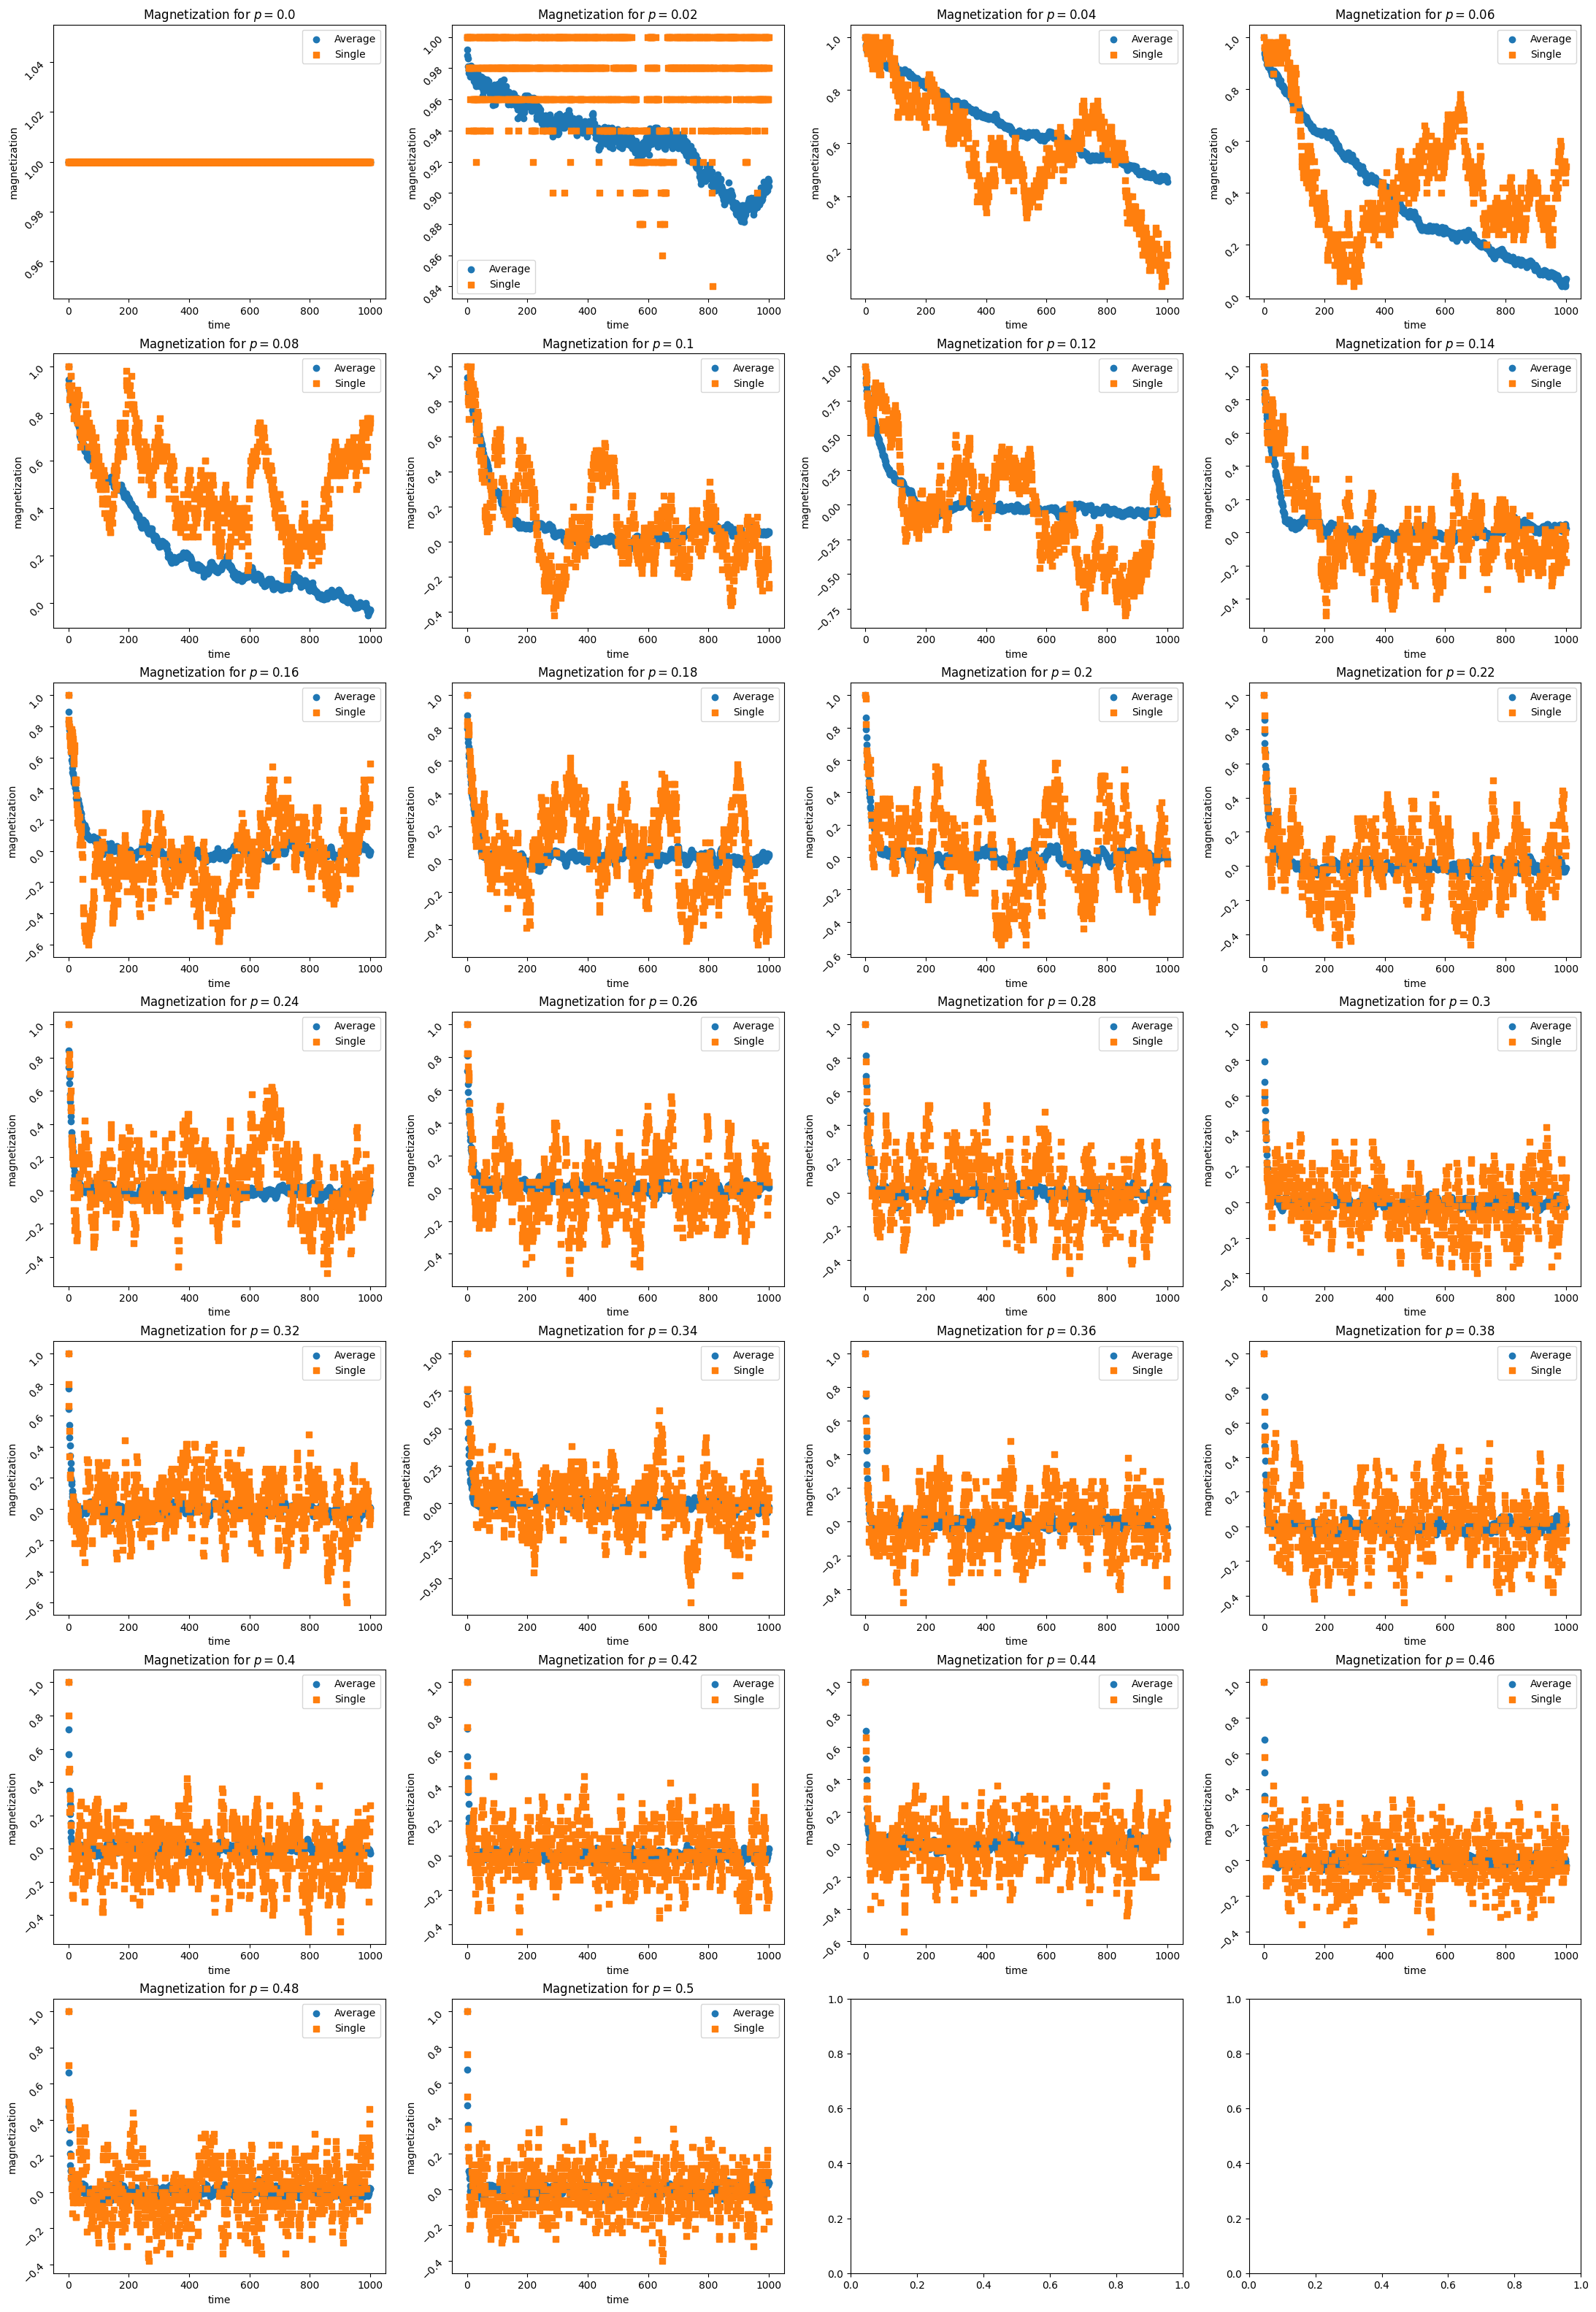

In [123]:
draw_time_magn(d_ws1_q1, d_ws1_q1_single, MC, q1, p)

## For $q = 4$.

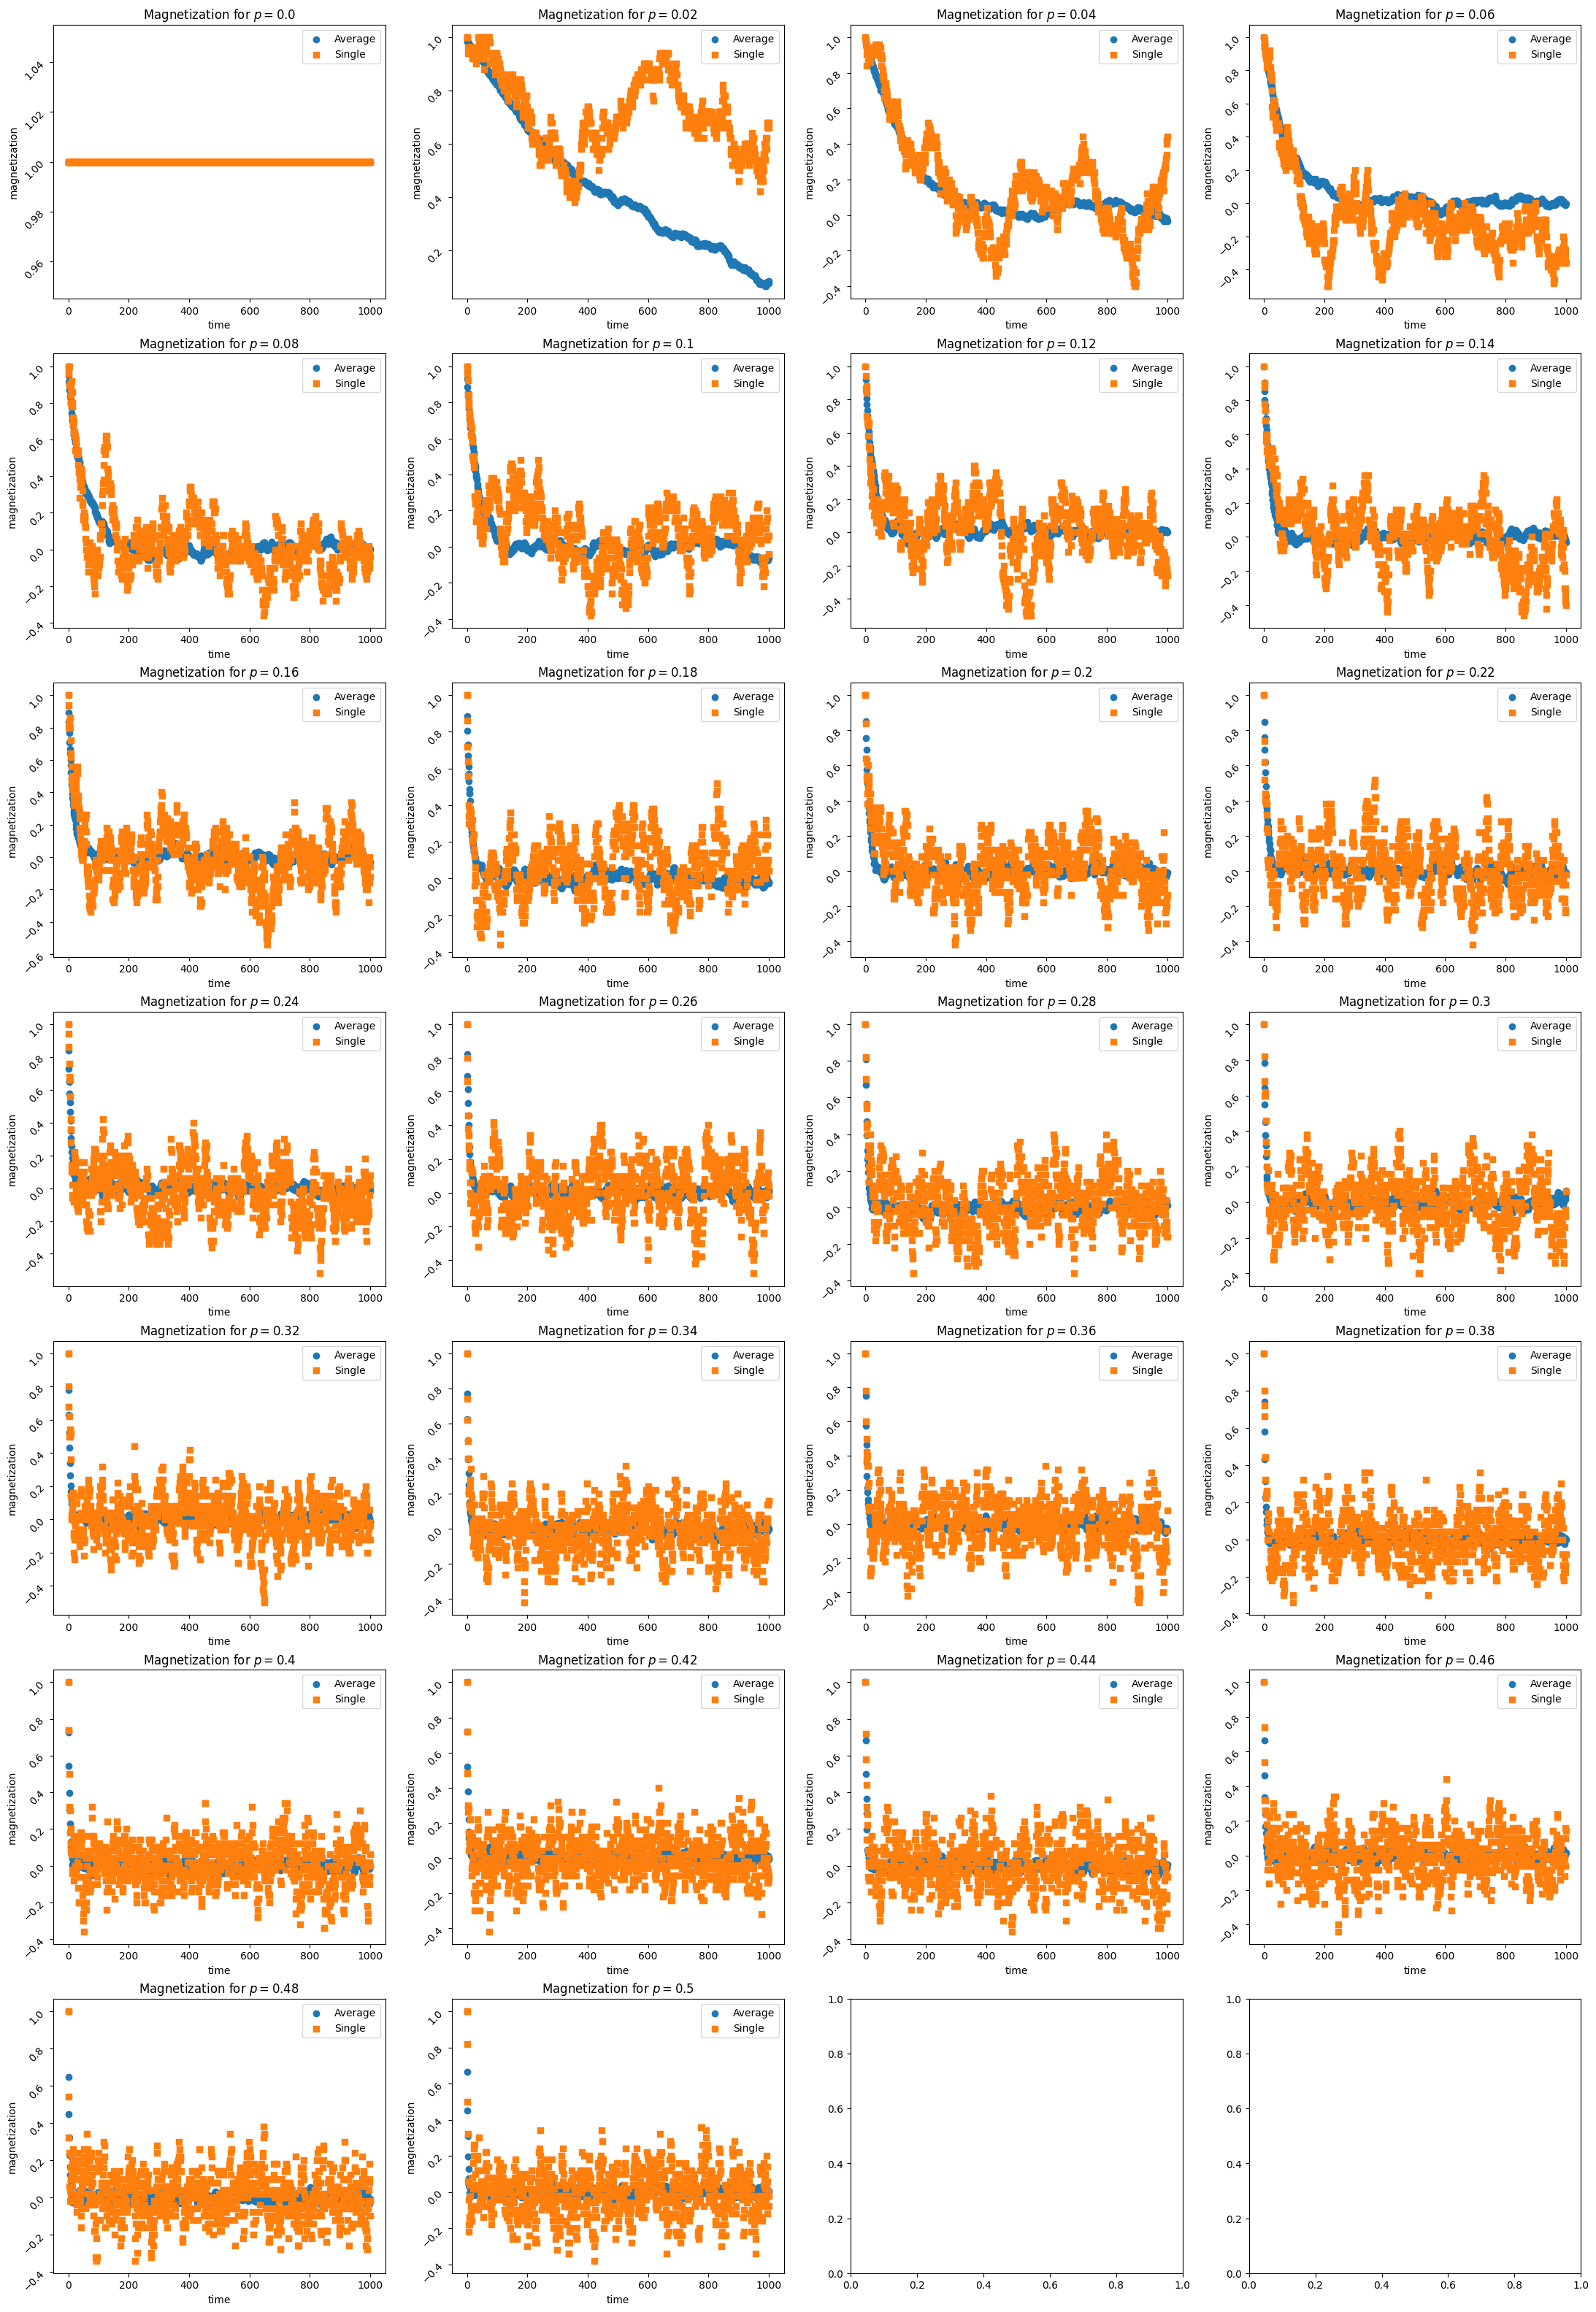

In [126]:
draw_time_magn(d_ws1_q2, d_ws1_q2_single, MC, q2, p)

Magnetization is similar for both cases.

In the beginning, magnetization is equal to 1 for all $p$. For $p = 0$ magnetization is constant and equal to 1. 

Magnetization becomes lower with time. It tends to be 0 because it is the average opinion $\left( \frac{1 + (-1)}{2} = 0 \right)$.

Magnetization from a single run is closer to the average one with time and fluctuate near it.

# Average final magnetization

Plot the average final magnetization as a function of independence factor $p$.

In [133]:
def draw_final_magn(cg, ba, ws1, ws2, q, p):
    """
    Plot the average final magnetization as a function of independence factor p.
    
    draw_final_magn(cg: np.array, ba: np.array, ws1: np.array, ws2: np.array, q: int, p: np.aaray) -> np.array

    Parameters
    ------
    cg: np.array
        Array with average magnetization for complete graph
    ba: np.array
        Array with average magnetization for Barabasi-Albert graph
    ws1: np.array
        Array with average magnetization for Watts–Strogatz with p = 0.01
    ws2: np.array
        Array with average magnetization for Watts–Strogatz with p = 0.2
    q: int
        Number of randomly picked neighbors influence a voter to change its opinion
    p: float
        Array with probabilities, if the spinson will act as independent
    """
    fig, ax = plt.subplots(1, 1, figsize = (8, 5))
    fig.suptitle(rf"Final magnetization for $q = {q}$")

    ax.scatter(p, cg.T[-1], label = 'Complete graph', alpha = 0.7)
    ax.scatter(p, ba.T[-1], label = r'$BA(100, 4)$', alpha = 0.7)
    ax.scatter(p, ws1.T[-1], label = r'$WS(100, 4, 0.01)$', alpha = 0.7)
    ax.scatter(p, ws2.T[-1], label = r'$WS(100, 4, 0.2)$', alpha = 0.7)
    ax.legend()
    ax.set(xlabel = 'p', ylabel = 'magnetization')
    plt.show()

## $q = 3$ and different network topologies

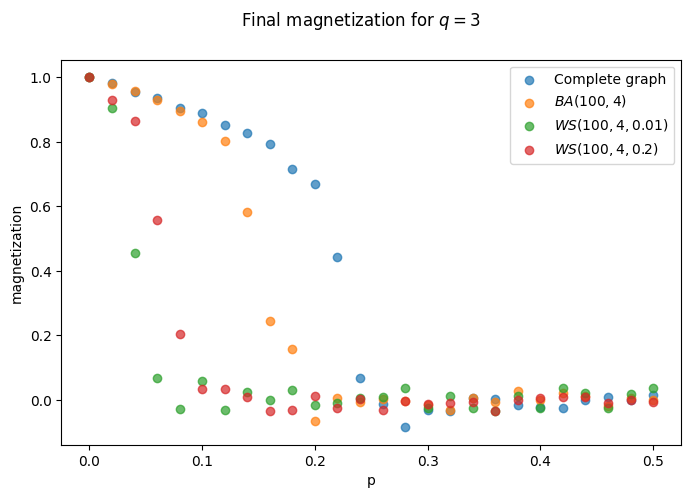

In [134]:
draw_final_magn(d_cg_q1, d_ba_q1, d_ws1_q1, d_ws2_q1, q1, p)

In the beginning (for small $p$), the average final magnetization is the lowest for Watts–Strogatz graph with probability $0.01$ and the greater for complete graph. In the end (for $p > 0.25$), it is close to $0$ for all networks.

## $q = 4$ and different network topologies

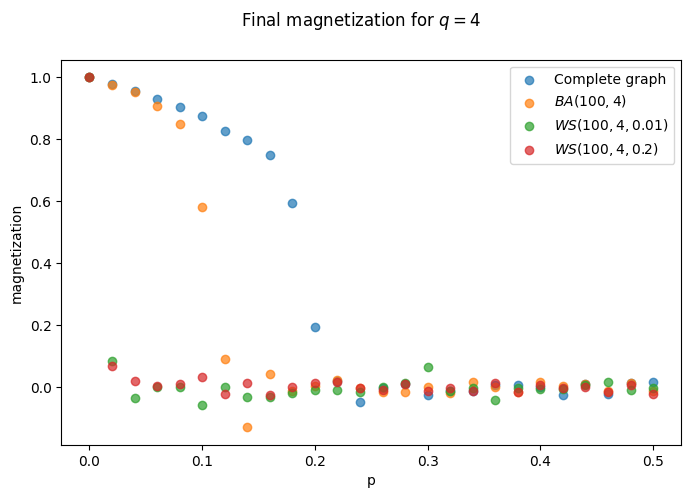

In [135]:
draw_final_magn(d_cg_q2, d_ba_q2, d_ws1_q2, d_ws2_q2, q2, p)

There are similar results. In the beginning (for small $p$), the average final magnetization is the lowest for Watts–Strogatz graph with probability $0.01$ and the greater for complete graph. In the end (for $p > 0.2$), it is close to $0$ for all networks.

## $WS(100, 4, 0.01)$ network and different values of $q$

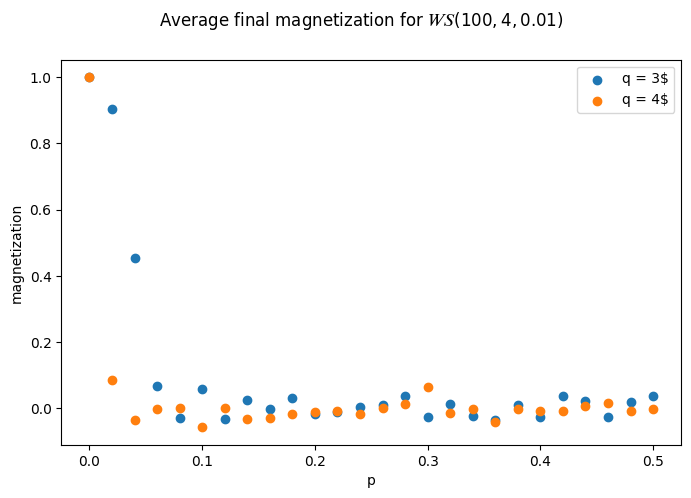

In [136]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))
fig.suptitle(rf"Average final magnetization for $𝑊𝑆(100, 4, 0.01)$")

ax.scatter(p, d_ws1_q1.T[-1], label = rf'q = {q1}$')
ax.scatter(p, d_ws1_q2.T[-1], label = rf'q = {q2}$')
ax.legend()
ax.set(xlabel = 'p', ylabel = 'magnetization')
plt.show()

In the beginning (for very small $p$), the average final magnetization for Watts–Strogatz graph with $q = 4$ is lower. But very soon it becomes very similar.